#Автоэнкодер

Импорт библиотек, загрузка и распаковка датасета Oxford pets

In [8]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import np_utils
import glob
import pathlib
from keras.layers import *
from IPython.display import display, Image
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

In [2]:
api_token = {"username":"midlow","key":"19e4a7b3c26e4d040a5179c6b36318cd"}

import sys
import json

!{sys.executable} -m pip install kaggle

!mkdir ~/.kaggle
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!kaggle datasets download -d tanlikesmath/the-oxfordiiit-pet-dataset

 99% 1.46G/1.48G [00:11<00:00, 145MB/s]
100% 1.48G/1.48G [00:11<00:00, 135MB/s]


In [4]:
!unzip the-oxfordiiit-pet-dataset.zip
!rm the-oxfordiiit-pet-dataset.zip
!rm *.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: images/images/leonberger_82.jpg  
  inflating: images/images/leonberger_83.jpg  
  inflating: images/images/leonberger_84.jpg  
  inflating: images/images/leonberger_85.jpg  
  inflating: images/images/leonberger_86.jpg  
  inflating: images/images/leonberger_87.jpg  
  inflating: images/images/leonberger_88.jpg  
  inflating: images/images/leonberger_89.jpg  
  inflating: images/images/leonberger_9.jpg  
  inflating: images/images/leonberger_90.jpg  
  inflating: images/images/leonberger_91.jpg  
  inflating: images/images/leonberger_92.jpg  
  inflating: images/images/leonberger_93.jpg  
  inflating: images/images/leonberger_94.jpg  
  inflating: images/images/leonberger_95.jpg  
  inflating: images/images/leonberger_96.jpg  
  inflating: images/images/leonberger_97.jpg  
  inflating: images/images/leonberger_98.jpg  
  inflating: images/images/leonberger_99.jpg  
  inflating: images/images/miniature_pin

##Создание автоэнкодера для генерации изображений 64*64

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


# Загрузка датасета Oxford pets
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'images',
        target_size=(64, 64),
        batch_size=32,
        class_mode='input')

# Создание автоэнкодера
input_img = Input(shape=(64, 64, 3))

# Кодировщик
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодировщик
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Found 7389 images belonging to 1 classes.


Обучение автоэнкодера

In [45]:
autoencoder.fit(train_generator, epochs=10)

Epoch 1/10
231/231 [==============================] - 45s 176ms/step - loss: 0.5737
Epoch 2/10
231/231 [==============================] - 37s 160ms/step - loss: 0.5465
Epoch 3/10
231/231 [==============================] - 38s 165ms/step - loss: 0.5429
Epoch 4/10
231/231 [==============================] - 38s 164ms/step - loss: 0.5410
Epoch 5/10
231/231 [==============================] - 36s 157ms/step - loss: 0.5400
Epoch 6/10
231/231 [==============================] - 36s 157ms/step - loss: 0.5391
Epoch 7/10
231/231 [==============================] - 36s 156ms/step - loss: 0.5386
Epoch 8/10
231/231 [==============================] - 36s 158ms/step - loss: 0.5381
Epoch 9/10
231/231 [==============================] - 36s 157ms/step - loss: 0.5377
Epoch 10/10
231/231 [==============================] - 36s 157ms/step - loss: 0.5374


Тестирование автоэнкодера

In [47]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'images',
        target_size=(64, 64),
        batch_size=1,
        class_mode='input')

Found 7389 images belonging to 1 classes.


In [50]:
decoded_imgs = autoencoder.predict(test_generator)

7389/7389 [==============================] - 46s 6ms/step


Отображение результатов

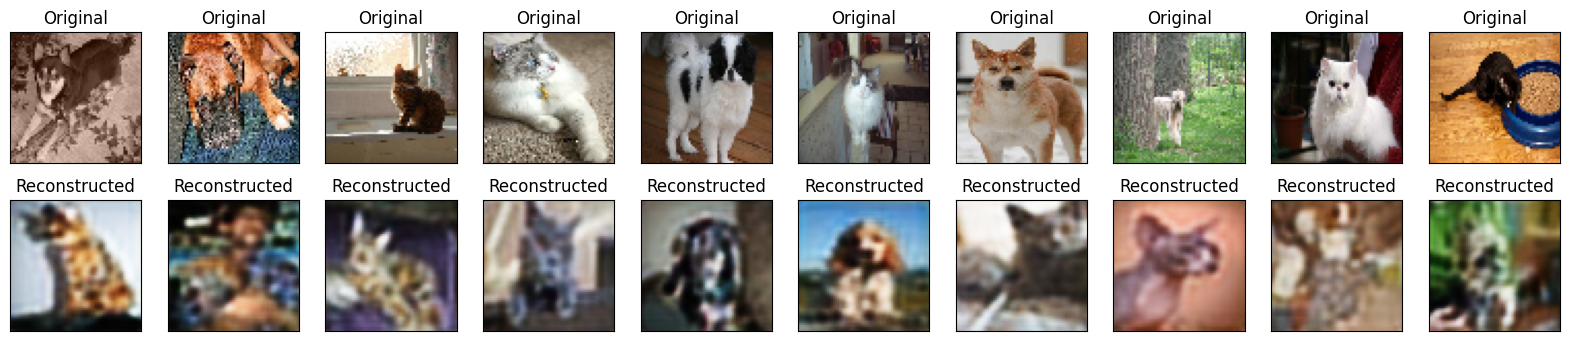

In [51]:
import matplotlib.pyplot as plt

n = 10  # количество изображений, которые будут показаны
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригинальное изображение
    ax = plt.subplot(2, n, i+1)
    plt.imshow(test_generator[i][0][0])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Восстановленное изображение
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

##Создание автоэнкодера для генерации изображений 128*128

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


# Загрузка датасета Oxford pets
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'images',
        target_size=(128, 128),
        batch_size=32,
        class_mode='input')

# Создание автоэнкодера
input_img = Input(shape=(128, 128, 3))

# Кодировщик
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодировщик
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение автоэнкодера
autoencoder.fit(train_generator, epochs=10)

# Тестирование автоэнкодера на новых изображениях
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'images',
        target_size=(128, 128),
        batch_size=1,
        class_mode='input')

Found 7389 images belonging to 1 classes.
Epoch 1/10
231/231 [==============================] - 48s 200ms/step - loss: 0.5589
Epoch 2/10
231/231 [==============================] - 41s 177ms/step - loss: 0.5371
Epoch 3/10
231/231 [==============================] - 43s 184ms/step - loss: 0.5347
Epoch 4/10
231/231 [==============================] - 41s 176ms/step - loss: 0.5331
Epoch 5/10
231/231 [==============================] - 43s 184ms/step - loss: 0.5322
Epoch 6/10
231/231 [==============================] - 41s 177ms/step - loss: 0.5315
Epoch 7/10
231/231 [==============================] - 41s 175ms/step - loss: 0.5311
Epoch 8/10
231/231 [==============================] - 41s 179ms/step - loss: 0.5305
Epoch 9/10
231/231 [==============================] - 42s 181ms/step - loss: 0.5301
Epoch 10/10
231/231 [==============================] - 41s 176ms/step - loss: 0.5300
Found 7389 images belonging to 1 classes.


In [ ]:
decoded_imgs = autoencoder.predict(test_generator)

7389/7389 [==============================] - 51s 7ms/step


Отображение результатов

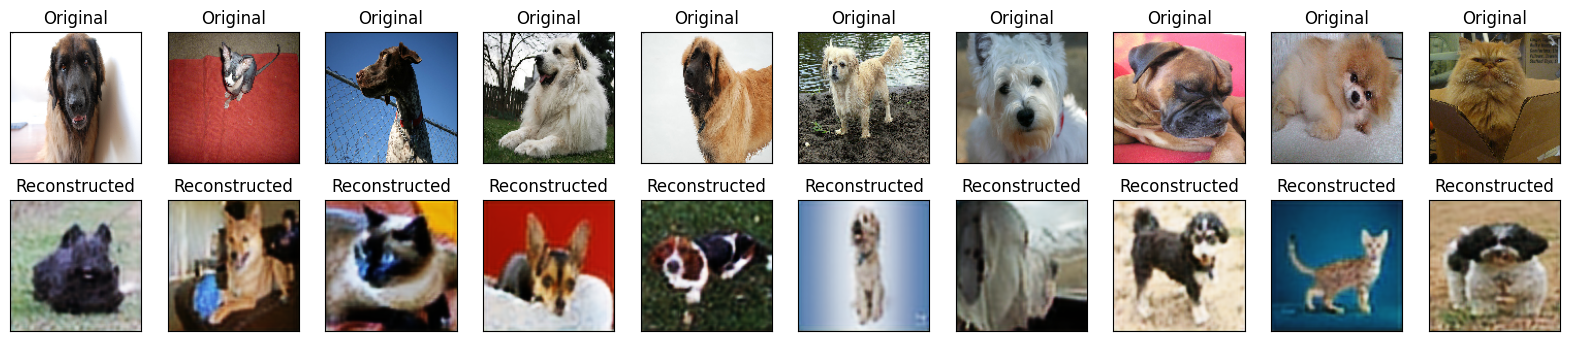

In [ ]:
import matplotlib.pyplot as plt

n = 10  # количество изображений, которые будут показаны
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригинальное изображение
    ax = plt.subplot(2, n, i+1)
    plt.imshow(test_generator[i][0][0])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Восстановленное изображение
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

##Создание автоэнкодера для генерации изображений 256*256

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


# Загрузка датасета Oxford pets
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'images',
        target_size=(256, 256),
        batch_size=32,
        class_mode='input')

# Создание автоэнкодера
input_img = Input(shape=(256, 256, 3))

# Кодировщик
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодировщик
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение автоэнкодера
autoencoder.fit(train_generator, epochs=10)

# Тестирование автоэнкодера на новых изображениях
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'images',
        target_size=(256, 256),
        batch_size=1,
        class_mode='input')

Found 7389 images belonging to 1 classes.
Epoch 1/10
231/231 [==============================] - 63s 255ms/step - loss: 0.5494
Epoch 2/10
231/231 [==============================] - 56s 241ms/step - loss: 0.5284
Epoch 3/10
231/231 [==============================] - 53s 228ms/step - loss: 0.5268
Epoch 4/10
231/231 [==============================] - 52s 224ms/step - loss: 0.5262
Epoch 5/10
231/231 [==============================] - 54s 232ms/step - loss: 0.5258
Epoch 6/10
231/231 [==============================] - 53s 229ms/step - loss: 0.5253
Epoch 7/10
231/231 [==============================] - 52s 226ms/step - loss: 0.5251
Epoch 8/10
231/231 [==============================] - 52s 223ms/step - loss: 0.5249
Epoch 9/10
231/231 [==============================] - 57s 248ms/step - loss: 0.5245
Epoch 10/10
231/231 [==============================] - 53s 229ms/step - loss: 0.5244
Found 7389 images belonging to 1 classes.


In [ ]:
decoded_imgs = autoencoder.predict(test_generator)

7389/7389 [==============================] - 56s 8ms/step


ResourceExhaustedError: ignored